# 1. 회귀분석(regression analysis)
$D$차원 벡터 독립변수 $x$와 이에 대응하는 스칼라 종속변수 $y$간의 관계를 정량적으로 찾아내는 작업
* 회귀분석 모형 종류
    * 결정론적 모형(deterministic Model)
    * 확률적 모형(probabilistic Model)

## 1.2. 결정론적 모형
독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat y$를 출력하는 함수 $f(x)$를 찾는 과정
$$ \hat y = f(x) ≒ y $$

#### 선형 회귀분석(linear regression analysis)
독립변수 $x$와 이에 대응하는 종속변수 $y$ 간의 관계가 다음과 같은 선형 함수 $f(x)$를 만족하는 것
$$ \hat y = w_0 + w_1x_1 + w_2x_2 + ... + w_Dx_D $$
$$ = w_0 + w^Tx $$
* $w$ : 함수 $f(x)$의 계수(coefficient), 이 선형회귀모형의 모수(parameter)

# 2. 상수항 결합
* 상수항 결합(bias augmentation) : 상수항이 0이 아닌 회귀분석모형인 경우 수식을 간단하게 만들기 위해 상수항을 독립변수에 추가하는 작업

$$ x_i = \begin{bmatrix} x_{i1} \\ x_{i2} \\ \dots \\ x_{iD} \end{bmatrix} → x_{i,a} = \begin{bmatrix} 1 \\ x_{i1} \\ x_{i2} \\ \dots \\ x_{iD} \end{bmatrix} $$ 

* 결합하면 모든 원소가 1인 벡터가 입력 데이터 행렬에 추가된다.

$$ X = \begin{bmatrix} 
    x_{11} & x_{12} & \dots &  x_{1D} \\
    x_{21} & x_{22} & \dots &  x_{2D} \\
    \dots & \dots & \dots & \dots \\
    x_{N1} & x_{N2} & \dots &  x_{nD}
    \end{bmatrix}
 → X_a = \begin{bmatrix} 
    1 & x_{11} & x_{12} & \dots &  x_{1D} \\
    1 & x_{21} & x_{22} & \dots &  x_{2D} \\
    \dots & \dots & \dots & \dots & \dots \\
    1 & x_{N1} & x_{N2} & \dots &  x_{ND}
    \end{bmatrix} $$
    
* 이렇게 되면 전체 수식이 상수항이 추가된 가중치 벡터 $w$와 상수항이 추가된 입력 데이터 벡터 $x$의 내적으로 간단히 표시된다.
$$ f(x) = w_0 + w_1x_1 + w_2x_2 + \dots + w_Dx_D $$

$$ = \begin{bmatrix} 1 & x_1 & x_2 & \dots & x_D \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ \dots \\ w_D \end{bmatrix} $$
$$ = x_a^Tw_a = w_a^Tx_a $$
* 상수항이 0이 아닌 경우 항상 상수항 결합을 하기 때문에 특별히 벡터 기호를 $x_a$ 또는 $w_a$라고 표시하지 않아도 상수항 결합이 되어 있는 경우가 많다.

 ## 2.1. 상수항 결합 방법 1: NumPy 이용

In [1]:
# 상수항 결합 시키기
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=2, bias=100, noise=10,
                             coef=True, random_state=1)
# 원래 데이터
X0[:5]

array([[ 0.0465673 ,  0.80186103],
       [-2.02220122,  0.31563495],
       [-0.38405435, -0.3224172 ],
       [-1.31228341,  0.35054598],
       [-0.88762896, -0.19183555]])

In [3]:
# 상수항 결합된 데이터
import numpy as np

X = np.hstack([np.ones((X0.shape[0], 1)), X0])
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

 ## 2.2. 상수항 결합 방법 2: Statsmodels 이용
##### add_constant 함수
상수항을 결합시킨다.

In [9]:
import statsmodels.api as sm

X = sm.add_constant(X0)
X[:5]

array([[ 1.        ,  0.0465673 ,  0.80186103],
       [ 1.        , -2.02220122,  0.31563495],
       [ 1.        , -0.38405435, -0.3224172 ],
       [ 1.        , -1.31228341,  0.35054598],
       [ 1.        , -0.88762896, -0.19183555]])

# 3. OLS
* OLS(Ordinary Least Squares) : 잔차제곱합(RSS : Residual Sum of Squares)을 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법
    * 가장 기본적인 결정론적 선형 회귀 방법
* 만약 $X^TX$ 행렬이 역행렬이 존재한다면, 최적 가중치 벡터 $w^*$를 구할 수 있다.
$$ w^* = (X^TX)^{-1}X^Ty $$
> **증명**  
우리가 사용하는 예측 모형은 상수항이 결합된 선형 모형이다.
$$ \hat y = Xw $$
    * 이 때 잔차 벡터(residual vector) $e$
    $$ e = y - \hat y $$
    $$ = y - Xw $$
    * 잔차제곱합 RSS
    $$ RSS = e^Te $$
    $$ = (y - Xw)^T(y-Xw) $$
    $$ = y^Ty - 2y^TXw + w^TX^TXw $$  
    * 잔차의 크기  
즉, 잔차제곱합을 가장 작게 하는 가중치 벡터를 구하기 위한 잔차제곱합의 그레디언트(gradient) 벡터
$$ \frac{dRSS}{dw} = -2X^Ty + 2X^TXw $$
잔차가 최소가 되는 최적화 조건은 그레디언트(gradient) 벡터가 0벡터이어야 하므로 다음 식이 성립한다.
$$ \frac{dRSS}{dw} = 0$$
$$ X^TXw^* = X^Ty $$
$$ w^* = (X^TX)^{-1}X^Ty $$

* $X^TX$ 행렬의 역행렬이 존재하고, 위에서 구한 값이 $f(w)$의 최저값이 되려면 $X^TX$가 양의 정부호(positive definite) 행렬이어야 한다.  
* 만약 $X$가 풀랭크가 아니면 즉, $X$의 각 행렬이 서로 독립이 아니면 $X^TX$가 양의 정부호가 아니고 역행렬이 존재하지 않으므로 위와 같은 해를 구할 수 없다.

# 4. 직교 방정식
* 직교 방정식(normal equation) : 그레디언트(gradient)가 0벡터가 되는 관계를 나타내는 식
$$ X^Ty - X^TXw = 0$$

#### 특징 행렬의 열벡터 $c_d$는 잔차 벡터 $e$와 수직이다.
* 직교 방정식을 인수분해하면
$$ X^T(y - Xw) = 0 $$
$$ X^Te = 0 $$
즉, $c_d$가 모든 데이터의 $d$번째 차원의 원소로 이루어진 데이터 벡터(특징 행렬의 열벡터)라고 할 때,  
모든 차원 $d (d = 0, ..., D)$에 대해 $c_d$는 잔차 벡터 $e$와 수직을 이룬다.
$$ c_d^T = 0 \text{ } (d = 0, ..., D) $$
또는
$$ c_d ⊥ e \text{ } (d = 0, ..., D) $$

#### 직교 방정식으로부터 알 수 있는 성질
1. $X$가 1-벡터를 가지고 상수항이 결합된 경우 잔차 벡터의 원소의 합은 0이다. 즉 잔차의 평균은 0이다.
$$ \sum_{i=0}^Ne_i = 0 $$
> **증명**  
$X$의 첫 번째 열이 1-벡터라는 것을 이용하면
$$ c_0^Te = 1^Te = \sum_{i=0}^Ne_i = 0 $$

2. $x$ 데이터의 평균값 $\bar x$에 대한 예측값은 $y$ 데이터의 평균값 $\bar y$이다.
> **증명**  
$$ \bar y = \frac{1}{N}1^Ty$$
$$ = \frac{1}{N}1^T(Xw + e) $$
$$ = \frac{1}{N}1^TXw + \frac{1}{N}1^Te $$
$$ = \frac{1}{N}1^TXw (y는 에러가 없어서 사라지는 듯)$$
$$ = \frac{1}{N}1^T \begin{bmatrix} c_1 & \dots & c_M \end{bmatrix}w $$
$$ = \begin{bmatrix}\frac{1}{N}1^Tc_1 & \dots & \frac{1}{N}1^Tc_D \end{bmatrix}w $$
$$ = \begin{bmatrix}\bar c_1 & \dots & \bar c_D \end{bmatrix}w $$
$$ = \bar x^Tw $$

#### 원래 데이터의 회귀분석 결과 = 평균이 0이 되게 평균 이동한 데이터의 회귀분석 결과
* 두 번째 성질을 사용하면 원래 데이터를 사용한 회귀분석 결과와 원래 데이터에서 평균이 0이 되게 평균 이동한 데이터를 사용한 회귀분석 결과가 같다는 것을 보일 수 있다.
$$ \hat y = Xw $$
$$ \hat y - \bar y = Xw - \bar y $$
$$ \hat y - \bar y = Xw - \bar Xw $$
$$ (\hat y - \bar y) = (X - \bar X)w $$
    * $\bar y$ : $y$의 평균으로만 이루어진 상수 벡터
    * $\bar X$ : 특징 행렬의 각 열의 평균을 열로 가지는 행렬

# 5. 선형 회귀분석 방법1 : NumPy 이용
## 5.1. NumPy의 선형대수 기능을 사용하여 OLS 방법으로 선형 회귀분석 하기

In [42]:
from sklearn.datasets import make_regression

bias = 100
X0, y, coef = make_regression(n_samples=100, n_features=1, bias=bias, noise=10,
                             coef=True, random_state=1)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1) # 행 벡터를 열 벡터로 변경

In [11]:
# make_regression 명령이 생성한 모수 값
coef

array(80.71051956)

따라서
$$ y = 100 + 80.71051956x + ε $$

### 5.1.1. 구한 수식을 이용한 선형회귀 계수 추정
#### OLS 해를 직접 이용하는 방법

In [12]:
w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
w

array([[102.02701439],
       [ 81.59750943]])

즉, 다음 방정식을 이용하여 $y$ 예측
$$ \hat y = 102.0270 + 81.5975x $$
이 결과에서 알 수 있는 것  
→ 선형 회귀를 통해 구한 결과는 실제(자연 법칙)와 비슷하지만 정확하지는 않다.

#### lstsq 명령을 이용하는 방법

In [13]:
w = np.linalg.lstsq(X, y)[0]
w

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[102.02701439],
       [ 81.59750943]])

### 5.1.2. 새로운 $x$값에 대해 $\hat y$을 구해본 결과를 원래 데이터와 비교

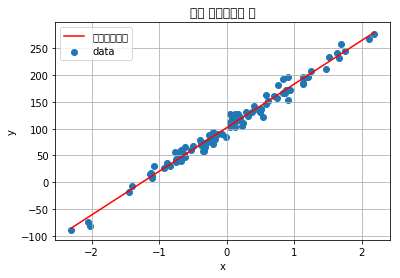

In [17]:
import matplotlib.pyplot as plt

x_new = np.linspace(np.min(X0), np.max(X0), 100)
X_new = sm.add_constant(x_new) # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="data")
plt.plot(x_new, y_new, 'r-', label="회귀분석결과")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.grid()
plt.legend()
plt.show()

# 6. 선형 회귀분석 방법2 : scikit-learn 이용
`linear_model` 서브패키지의 `LinearRegression` 클래스 사용

## 6.1. 사용법
1. `LinearRegression` 클래스 객체 생성  
`model = LinearRegression(fit_intercept=True)`
    * `fit_intercept` : 모형에 상수항이 있는가 없는가를 결정한다. (디폴트 `True`)

2. `fit` 메서드로 모형 추정  
    * 상수항 결합을 자동으로 해주므로 사용자가 직접 상수항 결합을 할 필요는 없다.
    * `fit` 메서드는 객체 자신을 반환한다.  
`model = model.fit(X, y)`  

> 회귀분석을 하고 나면 모형 객체는 다음의 속성을 가진다.  
* `coef_` : 추정된 가중치 벡터  
* `intercept_` : 추정된 상수항  

3. `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측  
`y_new = model_predict(x_new)`

## 6.2. 보스턴 집값 데이터 회귀분석

In [18]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()
model_boston = LinearRegression().fit(boston.data, boston.target)

특징 벡터의 이름과 비교하면 각각의 가중치가 가지는 의미를 알 수 있다.  
ex)  
방(RM) 하나가 증가하면 가격 예측치는 약 3,810 달러 정도 증가한다.

In [19]:
# 추정한 가중치 값
model_boston.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
model_boston.intercept_

36.459488385089855

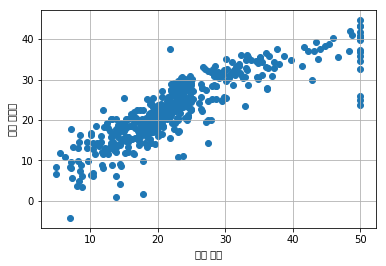

In [23]:
predictions = model_boston.predict(boston.data)

plt.scatter(boston.target, predictions)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.grid()
plt.show()

## 연습 문제
1. `LinearRegression` 클래스를 사용하여 위에서 만들어낸 1차원 가상 데이터 `X`, `y`를 회귀분석한다.

In [45]:
lin = LinearRegression()
lin.fit(X0, y)
lin.coef_, lin.intercept_

(array([[81.59750943]]), array([102.02701439]))

2. 시드값을 다르게 하여 새로운 가상 데이터 `X`, `y`를 만들고 회귀분석을 한다. 이번에는 가중치 계수의 오차가 어떻게 달라졌는가? 가중치 계수의 오차는 어느 정도의 크기를 가지는가?

# 7. 선형 회귀분석 방법3 : statsmodels 이용
* `OLS` 클래스를 사용하여 선형 회귀분석을 실시한다.

## 7.1. 사용법
1. `OLS` 클래스 객체 생성
    * 이 때 scikit-learn 패키지와 달리 데이터를 미리 주어야 하며, 상수항을 만들어주지 않아 `add_constant` 명령으로 상수항을 추가해야 한다.
    * 인수의 순서가 scikit-learn과 달리 출력 데이터를 먼저 넣어야 한다.  
`model = OLS(y, X)`

2. `fit` 메서드로 모형 추정
    * scikit-learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다.  
`result = model.fit()`

3. `RegressionResults` 클래스 객체 제공 메서드
    * `summary` : 결과 리포트용 메서드  
`print(result.summary())`
    * `prediction` : 예측 메서드
        * 예측을 위한 데이터는 추정 시와 동일하게 결합(augmentation) 해 주어야 한다.  
`y_new = result.predict(x_new)`

In [26]:
import pandas as pd

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 01 Nov 2018   Prob (F-statistic):          6.72e-135
Time:                        00:30:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

예측할 때는 입력 데이터가 추정모형과 동일한 형태가 돼야 한다.  

#### 직교방정식을 통해 얻은 $\hat y = \bar x^Tw$ 로 예시

In [31]:
# 원래 입력데이터의 평균값
x_new = dfX0.mean().values
x_new

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

`prediction` 명령의 인수로는 회귀분석에 사용했던 원래 $X$데이터와 동일한 형태의 데이터프레임을 만들어야 한다.  
여기에서 데이터 행이 하나인 경우 `add_constant`에 `has_constant="add"` 인수를 추가해야 한다.

In [35]:
dfx_new = sm.add_constant(pd.DataFrame(np.array(x_new)[:, np.newaxis].T, 
                                      columns=boston.feature_names),
                         has_constant="add")
dfx_new

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063


In [36]:
result_boston2.predict(dfx_new)

0    22.532806
dtype: float64

직교 방정식에서 증명했던 것처럼 이 예측값은 $y$ 데이터의 평균과 같다.

In [53]:
dfy.mean()

MEDV    22.532806
dtype: float64

## 연습 문제
1. `OLS` 클래스를 사용하여 위에서 구한 1차원 가상 데이터 `X`, `y`를 회귀분석한다.

In [59]:
virtual_ols = sm.OLS(y, X)
virtual_ols_result = virtual_ols.fit()
print(virtual_ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6149.
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           3.10e-90
Time:                        15:16:14   Log-Likelihood:                -362.92
No. Observations:                 100   AIC:                             729.8
Df Residuals:                      98   BIC:                             735.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.0270      0.923    110.510      0.0

2. 임의의 값 `x_new=1.0`를 지정하여 이 값에 대한 모형 예측치 `y_new`를 구하라.

In [90]:
ols_x_new = np.array([[1.0]])
df_ols_x_new = sm.add_constant(pd.DataFrame(ols_x_new, columns=["X1"]),
                              has_constant="add")
df_ols_x_new

,const,X1
0,1.0,1.0


In [91]:
virtual_ols_result.predict(df_ols_x_new)

0    183.624524
dtype: float64

In [92]:
y.mean()

106.97042423219284

----
##### RegressionResults 클래스
분석 결과를 다양한 속성에 저장해준다.
* 자주 사용되는 속성
    * `resid` : 잔차 벡터
    * `params` : 모수 벡터

In [93]:
result_boston2.resid.head()

0   -6.003843
1   -3.425562
2    4.132403
3    4.792964
4    8.256476
dtype: float64

In [94]:
result_boston2.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64